# Topic Modeling<a name="_topic modeling"></a>

Topic modeling is similar to cluster analysis... Topic Models are an unsupervised method (i.e., exploratory, no input from a human), to identify what a set of documents is "about."  But the algorithm can only describe topics using the words in the documents.

So we are looking for the words that are similar across documents. Unlike a cluster analysis, where a document is assigned to the closest cluster, a document can have multiple topics. It has a score for the "match" of the topic.

* Documents are made of words 
* Topics are described by words
* Documents may consist of different amounts of different topics. Topic “proportion.”

And each topic can have multiple words, each with a score for how important they are in the topic! It is often called "LDA topic modeling" because it uses a statistical distribution process called "latent dirichlet allocation".

Readings to help:

Topic Modeling: A Hands On Adventure in Big Data http://www.themacroscope.org/?page_id=788, 
Topic Modeling by Hand http:// www.themacroscope.org/?page_id=791, 
More: http://www.matthewjockers.net/2011/09/29/the-lda-buffet-is-now-open-or-latent-dirichlet-allocation-for-english-majors/

http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/


<img src="assets/Readme-e0540.png">

From [David Blei article in CACM](https://cacm.acm.org/magazines/2012/4/147361-probabilistic-topic-models/fulltext):

<img src="assets/Readme-a5b6b.png">

In [1]:
%matplotlib inline
import os
import re
import sys

import matplotlib.pylab as plt
import nltk
from nltk.tag import pos_tag
from gensim import corpora, models, similarities
import pandas as pd
import seaborn as sns

import nlp_utilities as mytools

STOPWORDS = nltk.corpus.stopwords.words('english')

In [23]:
files = mytools.get_filenames('data/SOTUsince1945/')

In [24]:
texts = mytools.load_texts_as_string(files)

In [26]:
# remember, this is a dictionary with keys and values.
texts.keys()

dict_keys(['data/SOTUsince1945/Harry_S._Truman_January_9,_1952.txt', 'data/SOTUsince1945/Lyndon_B._Johnson_January_8,_1964.txt', 'data/SOTUsince1945/Harry_S._Truman_January_7,_1948.txt', 'data/SOTUsince1945/Jimmy_Carter_January_16,_1981.txt', 'data/SOTUsince1945/Barack_Obama_January_12,_2016.txt', 'data/SOTUsince1945/Dwight_D._Eisenhower_February_2,_1953.txt', 'data/SOTUsince1945/Ronald_Reagan_January_25,_1983.txt', 'data/SOTUsince1945/Barack_Obama_January_27,_2010.txt', 'data/SOTUsince1945/George_W._Bush_February_2,_2005.txt', 'data/SOTUsince1945/George_W._Bush_January_29,_2002.txt', 'data/SOTUsince1945/John_F._Kennedy_January_30,_1961.txt', 'data/SOTUsince1945/George_W._Bush_February_27,_2001.txt', 'data/SOTUsince1945/Harry_S._Truman_January_7,_1953.txt', 'data/SOTUsince1945/Barack_Obama_January_24,_2012.txt', 'data/SOTUsince1945/Ronald_Reagan_January_26,_1982.txt', 'data/SOTUsince1945/Lyndon_B._Johnson_January_12,_1966.txt', 'data/SOTUsince1945/Dwight_D._Eisenhower_January_10,_1957.

## Tokenize and Clean First<a name="_tokenize and clean first"></a>

In [28]:
#  For later, it's useful to have the list of keys and values in separate lists.

tokenized_text = [mytools.tokenize_clean(value) for value in texts.values()]
sourcefilenames = [key for key in texts.keys()]

In [29]:
sourcefilenames

['data/SOTUsince1945/Harry_S._Truman_January_9,_1952.txt',
 'data/SOTUsince1945/Lyndon_B._Johnson_January_8,_1964.txt',
 'data/SOTUsince1945/Harry_S._Truman_January_7,_1948.txt',
 'data/SOTUsince1945/Jimmy_Carter_January_16,_1981.txt',
 'data/SOTUsince1945/Barack_Obama_January_12,_2016.txt',
 'data/SOTUsince1945/Dwight_D._Eisenhower_February_2,_1953.txt',
 'data/SOTUsince1945/Ronald_Reagan_January_25,_1983.txt',
 'data/SOTUsince1945/Barack_Obama_January_27,_2010.txt',
 'data/SOTUsince1945/George_W._Bush_February_2,_2005.txt',
 'data/SOTUsince1945/George_W._Bush_January_29,_2002.txt',
 'data/SOTUsince1945/John_F._Kennedy_January_30,_1961.txt',
 'data/SOTUsince1945/George_W._Bush_February_27,_2001.txt',
 'data/SOTUsince1945/Harry_S._Truman_January_7,_1953.txt',
 'data/SOTUsince1945/Barack_Obama_January_24,_2012.txt',
 'data/SOTUsince1945/Ronald_Reagan_January_26,_1982.txt',
 'data/SOTUsince1945/Lyndon_B._Johnson_January_12,_1966.txt',
 'data/SOTUsince1945/Dwight_D._Eisenhower_January_10,

In [37]:
tokenized_text = [mytools.remove_custom(tokens, ["n't", "'s", "'m", "'d", "'re", "'ve", "'ll"]) for tokens in tokenized_text]

In [34]:
tokenized_text[0][0:10]

['mr.',
 'president',
 'mr.',
 'speaker',
 'members',
 'congress',
 'honor',
 'report',
 'congress',
 'state']

## This is where we run the important part using gensim. Like K-means clustering, you ask for a number of topics.  You will fiddle with that depending on your results and what you need.<a name="_this is where we run the important part using gensim. like k-means clustering, you ask for a number of topics.  you will fiddle with that depending on your results and what you need."></a>

In [35]:
NUMTOPICS = 4

dictionary = corpora.Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=1, no_above=0.8) # gensim
corpus = [dictionary.doc2bow(text) for text in tokenized_text]  # bag of words required for gensim operation
# our topic number NUMTOPICS goes in here:
lda = models.LdaModel(corpus, num_topics=NUMTOPICS, id2word=dictionary, update_every=5, chunksize=100, passes=10)
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [38]:
topics_matrix

[(0,
  [('dollars', 0.0092208734513262672),
   ('fiscal', 0.0060864910993417599),
   ('expenditures', 0.0050801777657367361),
   ('production', 0.0033334398929980493),
   ('housing', 0.002859209703749551),
   ('labor', 0.0026113312191263669),
   ('shall', 0.002564495923637917),
   ('administration', 0.00244548698262697),
   ('present', 0.0024239005236967371),
   ('veterans', 0.0023277079776346278),
   ('total', 0.0023128403910210081),
   ('control', 0.0023119040340497201),
   ('international', 0.0022925861241976119),
   ('estimated', 0.0022231140203295718),
   ('prices', 0.0021451265029141962),
   ('recommended', 0.0020964826832591604),
   ('general', 0.0020503462028160185),
   ('debt', 0.0019926589551753173),
   ('employment', 0.0019402673747331192),
   ('construction', 0.0018234526896576213)]),
 (1,
  [('administration', 0.0034741301950513954),
   ('shall', 0.0025999687573860725),
   ('soviet', 0.0025199179536312642),
   ('major', 0.0023340166103523272),
   ('international', 0.002327

In [36]:
# We count from 0 in Python.  But the tool we use below starts from 1, so adding one to the topic number here:
for topic in topics_matrix:
    words = [x[0] + "(" + str("{0:.4f}".format(x[1])) + ")" for x in topic[1]]
    print("Topic" + str(topic[0] + 1) + ";" + ",".join(words)+"\n")

Topic1;dollars(0.0092),fiscal(0.0061),expenditures(0.0051),production(0.0033),housing(0.0029),labor(0.0026),shall(0.0026),administration(0.0024),present(0.0024),veterans(0.0023),total(0.0023),control(0.0023),international(0.0023),estimated(0.0022),prices(0.0021),recommended(0.0021),general(0.0021),debt(0.0020),employment(0.0019),construction(0.0018)

Topic2;administration(0.0035),shall(0.0026),soviet(0.0025),major(0.0023),international(0.0023),problems(0.0023),nuclear(0.0021),toward(0.0020),areas(0.0020),inflation(0.0019),countries(0.0018),cooperation(0.0017),among(0.0017),weapons(0.0017),increased(0.0017),tonight(0.0017),production(0.0016),europe(0.0016),assistance(0.0016),upon(0.0016)

Topic3;tonight(0.0062),'re(0.0052),'ve(0.0051),get(0.0039),ask(0.0034),reform(0.0029),century(0.0029),community(0.0026),'ll(0.0025),cut(0.0025),child(0.0025),change(0.0025),deficit(0.0023),put(0.0023),spending(0.0023),businesses(0.0023),pay(0.0023),school(0.0022),welfare(0.0021),bill(0.0021)

Topic4;sh

##  Inspect in Excel

If you want to look at the scores of each file for each topic, you can print out a CSV file.

In [39]:
# print and report results in a csv file.
import csv
with open("data/doc_topics.csv", "w", errors="ignore") as handle:
    writer = csv.writer(handle, delimiter="\t")
    writer.writerow(["file", "topic", "score"])
    for i, doc in enumerate(corpus):
        topics = lda.get_document_topics(doc)
        for topic in topics:
            # write to the csv file
            writer.writerow([sourcefilenames[i], "topic" + str(topic[0] + 1), str(topic[1])])
            # print to the screen - these are different operations
            print(sourcefilenames[i] + "\ttopic" + str(topic[0] + 1) + "\t" +str(topic[1]))

data/SOTUsince1945/Harry_S._Truman_January_9,_1952.txt	topic2	0.998810867275
data/SOTUsince1945/Lyndon_B._Johnson_January_8,_1964.txt	topic2	0.610360271334
data/SOTUsince1945/Lyndon_B._Johnson_January_8,_1964.txt	topic3	0.389133605975
data/SOTUsince1945/Harry_S._Truman_January_7,_1948.txt	topic1	0.244685887287
data/SOTUsince1945/Harry_S._Truman_January_7,_1948.txt	topic2	0.754998898692
data/SOTUsince1945/Jimmy_Carter_January_16,_1981.txt	topic2	0.999942488321
data/SOTUsince1945/Barack_Obama_January_12,_2016.txt	topic3	0.999580749629
data/SOTUsince1945/Dwight_D._Eisenhower_February_2,_1953.txt	topic1	0.0690579154685
data/SOTUsince1945/Dwight_D._Eisenhower_February_2,_1953.txt	topic2	0.930743903174
data/SOTUsince1945/Ronald_Reagan_January_25,_1983.txt	topic1	0.0116477741653
data/SOTUsince1945/Ronald_Reagan_January_25,_1983.txt	topic2	0.391370568114
data/SOTUsince1945/Ronald_Reagan_January_25,_1983.txt	topic3	0.596844832401
data/SOTUsince1945/Barack_Obama_January_27,_2010.txt	topic3	0.999

You could load that file into Excel if you wanted to do some fast analysis. 

<img src="assets/Readme-333ea.png">

And then highlight as you like...

<img src="assets/Readme-c1303.png">

That's one of the benefits of writing out CSV files.


Or we can do some in Python using Pandas:

## Pandas Analysis

In [40]:
topics = pd.read_csv("data/doc_topics.csv", sep="\t")

In [43]:
topics.head()

,file,topic,score
0,"data/SOTUsince1945/Harry_S._Truman_January_9,_...",topic2,0.998811
1,data/SOTUsince1945/Lyndon_B._Johnson_January_8...,topic2,0.610360
2,data/SOTUsince1945/Lyndon_B._Johnson_January_8...,topic3,0.389134
3,"data/SOTUsince1945/Harry_S._Truman_January_7,_...",topic1,0.244686
4,"data/SOTUsince1945/Harry_S._Truman_January_7,_...",topic2,0.754999


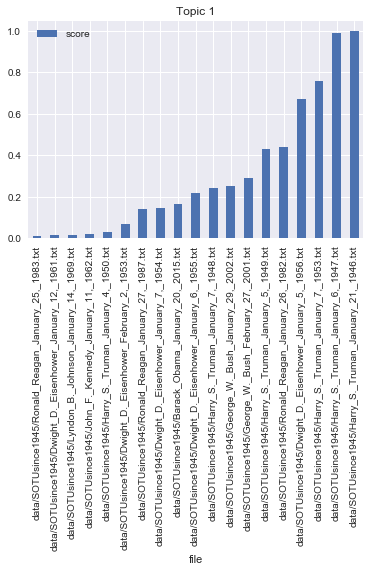

In [44]:
topics.groupby("topic").get_group("topic1").sort_values(by="score").plot(kind="bar", x="file", title="Topic 1")

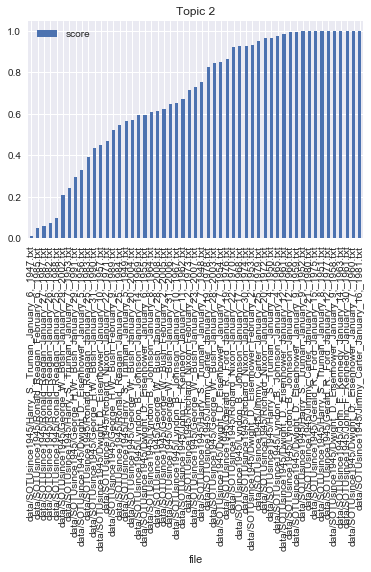

In [45]:
topics.groupby("topic").get_group("topic2").sort_values(by="score").plot(kind="bar", x="file", title="Topic 2")

In [46]:
# Maybe you want to filter out low scores to work with.
hightopics = topics[topics["score"] > .5]

In [47]:
hightopics

,file,topic,score
0,"data/SOTUsince1945/Harry_S._Truman_January_9,_...",topic2,0.998811
1,data/SOTUsince1945/Lyndon_B._Johnson_January_8...,topic2,0.610360
4,"data/SOTUsince1945/Harry_S._Truman_January_7,_...",topic2,0.754999
5,"data/SOTUsince1945/Jimmy_Carter_January_16,_19...",topic2,0.999942
6,"data/SOTUsince1945/Barack_Obama_January_12,_20...",topic3,0.999581
8,data/SOTUsince1945/Dwight_D._Eisenhower_Februa...,topic2,0.930744
11,"data/SOTUsince1945/Ronald_Reagan_January_25,_1...",topic3,0.596845
12,"data/SOTUsince1945/Barack_Obama_January_27,_20...",topic3,0.999670
13,"data/SOTUsince1945/George_W._Bush_February_2,_...",topic2,0.623484
17,"data/SOTUsince1945/George_W._Bush_January_29,_...",topic3,0.540643


## Visualizing and Tuning your Topics with LDA Vis<a name="_visualizing and tuning your topics with lda vis"></a>

You need to `pip install pyldavis` in a terminal/cmd window.

**Saliency** and **Relevancy** -- 2 new concepts to make it easier to explore the relationships 
between terms and topics.  (Documents, though, are still hidden in this display.)  The lambda in the UI view below is a weight term for relevancy.

You can read about the code here: https://github.com/bmabey/pyLDAvis; and the original paper: http://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

Code examples using sklearn:
http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb#topic=0&lambda=1&term=

More examples on visualizing topic models: 
https://speakerdeck.com/bmabey/visualizing-topic-models


In [48]:
%matplotlib inline
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [49]:
# requires that you have installed pyldavis, and run the code to produce lda, corpus, and dictionary above.

# default arrangement is by PCA, principal component analysis.
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [50]:
#  layout with tsne instead:
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [51]:
#  layout with mmds instead:
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


## For a client, you should come up with a human-interpreted explanation of these topics.  For example:


* Topic 1, might be "a great place for beer."  Or "international defense."
* Topic 2, maybe "education and welfare."
* Topic 3 is "economic policy".
* Topic 4 is "recent terrorism".

Further analysis options for your final project: tag the reviews by topic, and check the review sentiment by topic group. Check the avg scores by topic group.
Look up the context for these words in these smaller topics.  Use a concordance tool or the concordance function in nltk.

## Topics Over Time

From [Ben Schmidt analysis of scripts](http://sappingattention.blogspot.fr/2014/12/fundamental-plot-arcs-seen-through.html):

<img src="assets/Readme-423a4.png">


From [David Blei in CACM](https://cacm.acm.org/magazines/2012/4/147361-probabilistic-topic-models/fulltext):

<img src="assets/Readme-51589.png">